In [1]:
import qmath
import torch
import mbqc

In [2]:
mbqc_q2 = mbqc.MBQC(nqubit=1)
mbqc_q2.node(1)
mbqc_q2.entanglement([0,1])

mbqc_q2.measurement(wires=0)

mbqc_q2.X(wires=1, signal_domain=[0])
mbqc_q2.node(2)
mbqc_q2.entanglement([1,2])

mbqc_q2.measurement(wires=2)

mbqc_q2.X(wires=1, signal_domain=[0])
# mbqc_q2.Z(wires=1, signal_domain=[0,1])
mbqc_q2


MBQC(
  (operators): Sequential(
    (0): Node(wires=[1])
    (1): Entanglement(wires=[0, 1])
    (2): Measurement(wires=[0], plane=XY, angle=0, t_domain=None, s_domain=None)
    (3): XCorrection(wires=[1], signal_domain=[0])
    (4): Node(wires=[2])
    (5): Entanglement(wires=[1, 2])
    (6): Measurement(wires=[2], plane=XY, angle=0, t_domain=None, s_domain=None)
    (7): XCorrection(wires=[1], signal_domain=[0])
  )
)

In [3]:
print(mbqc_q2())

tensor([ 1.0000e+00+0.j, -1.9419e-16+0.j])


In [4]:
mbqc_q2.measured_dic

{0: 0, 2: 0}

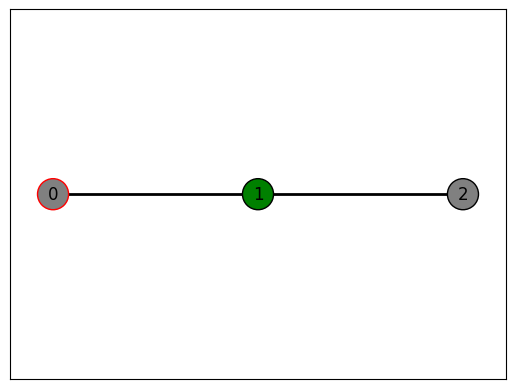

In [5]:

mbqc_q2.draw(wid=3)

In [6]:
mbqc_q2 = mbqc.MBQC(nqubit=2)
mbqc_q2.node(2)
mbqc_q2.node(3)
mbqc_q2.node(4)

mbqc_q2.node(5)
mbqc_q2.node(6)
mbqc_q2.node(7)
mbqc_q2.entanglement([0,2])
mbqc_q2.entanglement([1,2])
mbqc_q2.entanglement([0,3])
mbqc_q2.entanglement([1,6])
mbqc_q2.measurement(wires=0)
mbqc_q2.measurement(wires=3)
mbqc_q2.measurement(wires=6)
mbqc_q2.X(wires=7, signal_domain=[0,1])
mbqc_q2.Z(wires=7, signal_domain=[0,1])
mbqc_q2


MBQC(
  (operators): Sequential(
    (0): Node(wires=[2])
    (1): Node(wires=[3])
    (2): Node(wires=[4])
    (3): Node(wires=[5])
    (4): Node(wires=[6])
    (5): Node(wires=[7])
    (6): Entanglement(wires=[0, 2])
    (7): Entanglement(wires=[1, 2])
    (8): Entanglement(wires=[0, 3])
    (9): Entanglement(wires=[1, 6])
    (10): Measurement(wires=[0], plane=XY, angle=0, t_domain=None, s_domain=None)
    (11): Measurement(wires=[3], plane=XY, angle=0, t_domain=None, s_domain=None)
    (12): Measurement(wires=[6], plane=XY, angle=0, t_domain=None, s_domain=None)
    (13): XCorrection(wires=[7], signal_domain=[0, 1])
    (14): ZCorrection(wires=[7], signal_domain=[0, 1])
  )
)

In [7]:
mbqc_q2()
mbqc_q2.unmeasured_dic

{1: 0, 2: 1, 4: 2, 5: 3, 7: 4}

In [8]:
mbqc_q2.measured_dic


{0: 0, 3: 0, 6: 0}

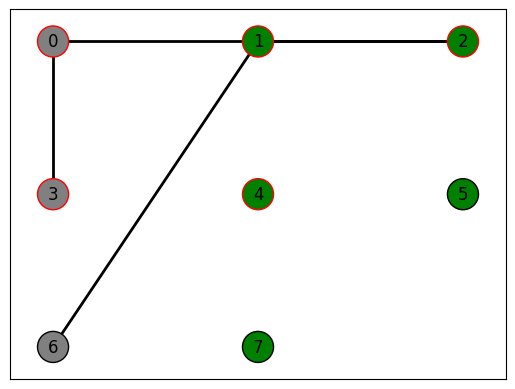

In [9]:
mbqc_q2.draw(wid=3)


In [10]:
print(mbqc_q2.measured_dic.get(2))

None


In [11]:
def apply_matrix_to_qubit(state_vector, matrix, target_qubit):
    """
    Apply a 2x2 matrix to a specific qubit in a multi-qubit state vector.

    Args:
    state_vector (torch.Tensor): The multi-qubit state vector.
    matrix (torch.Tensor): The 2x2 matrix to apply.
    target_qubit (int): The index of the qubit to apply the matrix to.

    Returns:
    torch.Tensor: The state vector after applying the matrix.
    """
    num_qubits = int(torch.log2(torch.tensor(state_vector.shape[0])))

    if target_qubit >= num_qubits:
        raise ValueError("Target qubit index out of range.")

    # Reshape the state vector to a multi-dimensional tensor
    state_tensor = state_vector.view([2] * num_qubits)

    # Permute the target qubit to the first position
    perm = [target_qubit] + [i for i in range(num_qubits) if i != target_qubit]
    state_tensor = state_tensor.permute(perm)

    # Reshape to apply the matrix
    state_tensor = state_tensor.reshape(2, -1)

    # Apply the matrix
    state_tensor = torch.matmul(matrix, state_tensor)

    # Reshape and permute back
    state_tensor = state_tensor.reshape([2] * num_qubits)
    inv_perm = [perm.index(i) for i in range(num_qubits)]
    state_tensor = state_tensor.permute(inv_perm)

    # Reshape back to a vector
    return state_tensor.reshape(-1)

# Example usage:
num_qubits = 3
initial_state = torch.ones(2**num_qubits) / torch.sqrt(torch.tensor(2**num_qubits))
target_qubit = 1
pauli_z = torch.tensor([[1., 0.], [0., -1.]])

result = apply_matrix_to_qubit(initial_state, pauli_z, target_qubit)
print("Initial state:", initial_state)
print("After applying Pauli-Z to qubit", target_qubit, ":", result)


Initial state: tensor([0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.3536])
After applying Pauli-Z to qubit 1 : tensor([ 0.3536,  0.3536, -0.3536, -0.3536,  0.3536,  0.3536, -0.3536, -0.3536])
